# Ailuropoda melanoleuca - analýza genomu

## Panda velká

### Panda velká je oficiálně všežravec. Moc ráda má bambus a při přežvykování se jí třesou uši.
### Má 5 prstů a k tomu palec navíc.
### Samice rodí dvě mláďata, ale stará se vždy jen o jedno.


![panda](http://3w6kx9401skz1bup4i1gs9ne.wpengine.netdna-cdn.com/wp-content/uploads/2016/09/telegraph-1.jpg)

### Zpracování dat před samotnou analýzou

In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
import re

In [52]:
genes=pd.read_table('genes.gtf', header=None, dtype={0:np.object})   
transcripts=pd.read_table('trans.gtf', header=None, dtype={0:np.object}) 

In [53]:
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [54]:
def parse_attributes(attributes_str):
    """Načte obsah sloupce attribute jako `dict`.
    
    - Pozor, neporadí si se středníky v hodnotách a očekává uvozovky
      kolem každé hodnoty.
      
      
    Parametry:
    
    `attributes_str` - hodnota GTF sloupce attribute jako string
    """
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out


s = """gene_id "ENSG00000241860"; gene_version "6"; transcript_id "ENST00000484859"; transcript_version "1"; gene_name "RP11-34P13.13"; gene_source "havana"; gene_biotype "processed_transcript"; havana_gene "OTTHUMG00000002480"; havana_gene_version "3"; transcript_name "RP11-34P13.13-004"; transcript_source "havana"; transcript_biotype "antisense"; havana_transcript "OTTHUMT00000007035"; havana_transcript_version "1"; tag "basic"; transcript_support_level "5";"""
parse_attributes(s)

{'gene_biotype': 'processed_transcript',
 'gene_id': 'ENSG00000241860',
 'gene_name': 'RP11-34P13.13',
 'transcript_biotype': 'antisense',
 'transcript_id': 'ENST00000484859',
 'transcript_name': 'RP11-34P13.13-004'}

In [55]:
def split_attribute_column(df):
    """Rozdělí sloupec `attribute` data frame GTF souboru do vlastních
    sloupců.
    """
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genesAttr = split_attribute_column(genes)
transcriptsAttr = split_attribute_column(transcripts)

In [56]:
genesAttr.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,GL192338.1,ensembl,gene,74838,213168,.,+,.,protein_coding,ENSAMEG00000016232,CHD9
1,GL192338.1,ensembl,gene,239478,289331,.,+,.,protein_coding,ENSAMEG00000016277,RBL2
2,GL192338.1,ensembl,gene,291367,297093,.,-,.,protein_coding,ENSAMEG00000016345,AKTIP
3,GL192338.1,ensembl,gene,376932,463296,.,-,.,protein_coding,ENSAMEG00000016363,RPGRIP1L
4,GL192338.1,ensembl,gene,466443,839125,.,+,.,protein_coding,ENSAMEG00000016388,FTO


In [57]:
transcriptsAttr.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,GL192338.1,ensembl,transcript,74838,213168,.,+,.,protein_coding,ENSAMEG00000016232,CHD9,protein_coding,ENSAMET00000017883,CHD9-201
1,GL192338.1,ensembl,transcript,239478,289331,.,+,.,protein_coding,ENSAMEG00000016277,RBL2,protein_coding,ENSAMET00000017960,RBL2-201
2,GL192338.1,ensembl,transcript,291367,297093,.,-,.,protein_coding,ENSAMEG00000016345,AKTIP,protein_coding,ENSAMET00000017981,AKTIP-201
3,GL192338.1,ensembl,transcript,376932,463296,.,-,.,protein_coding,ENSAMEG00000016363,RPGRIP1L,protein_coding,ENSAMET00000018009,RPGRIP1L-201
4,GL192338.1,ensembl,transcript,466443,839125,.,+,.,protein_coding,ENSAMEG00000016388,FTO,protein_coding,ENSAMET00000018031,FTO-201


In [58]:
%matplotlib inline

### Přidání sloupce length

In [59]:
genesAttr["length"] = genesAttr["end"] - genesAttr["start"]
genesAttr.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,length
0,GL192338.1,ensembl,gene,74838,213168,.,+,.,protein_coding,ENSAMEG00000016232,CHD9,138330
1,GL192338.1,ensembl,gene,239478,289331,.,+,.,protein_coding,ENSAMEG00000016277,RBL2,49853
2,GL192338.1,ensembl,gene,291367,297093,.,-,.,protein_coding,ENSAMEG00000016345,AKTIP,5726
3,GL192338.1,ensembl,gene,376932,463296,.,-,.,protein_coding,ENSAMEG00000016363,RPGRIP1L,86364
4,GL192338.1,ensembl,gene,466443,839125,.,+,.,protein_coding,ENSAMEG00000016388,FTO,372682


In [60]:
transcriptsAttr["length"] = transcriptsAttr["end"] - transcriptsAttr["start"]
transcriptsAttr.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name,length
0,GL192338.1,ensembl,transcript,74838,213168,.,+,.,protein_coding,ENSAMEG00000016232,CHD9,protein_coding,ENSAMET00000017883,CHD9-201,138330
1,GL192338.1,ensembl,transcript,239478,289331,.,+,.,protein_coding,ENSAMEG00000016277,RBL2,protein_coding,ENSAMET00000017960,RBL2-201,49853
2,GL192338.1,ensembl,transcript,291367,297093,.,-,.,protein_coding,ENSAMEG00000016345,AKTIP,protein_coding,ENSAMET00000017981,AKTIP-201,5726
3,GL192338.1,ensembl,transcript,376932,463296,.,-,.,protein_coding,ENSAMEG00000016363,RPGRIP1L,protein_coding,ENSAMET00000018009,RPGRIP1L-201,86364
4,GL192338.1,ensembl,transcript,466443,839125,.,+,.,protein_coding,ENSAMEG00000016388,FTO,protein_coding,ENSAMET00000018031,FTO-201,372682


#### Počet chromozomů

In [61]:
sum(genesAttr["seqname"].value_counts() > 0)

2896

In [62]:
genesAttr["seqname"].unique()


array(['GL192338.1', 'GL192339.1', 'GL192340.1', ..., 'GL255160.1',
       'GL265186.1', 'GL272367.1'], dtype=object)

#### Počet genů

In [63]:
sum(genesAttr["gene_id"].value_counts() > 0)

23262

#### Počet transkriptů

In [64]:
sum(transcriptsAttr["transcript_id"].value_counts() > 0)

25055

#### Počet genů s více transkripty

In [65]:
sum(transcriptsAttr["gene_id"].value_counts() > 1)

1605

#### Počty genů na vláknech 

In [66]:
genesAttr["strand"].value_counts()

-    11707
+    11555
Name: strand, dtype: int64

#### Počty genů na chromozomech

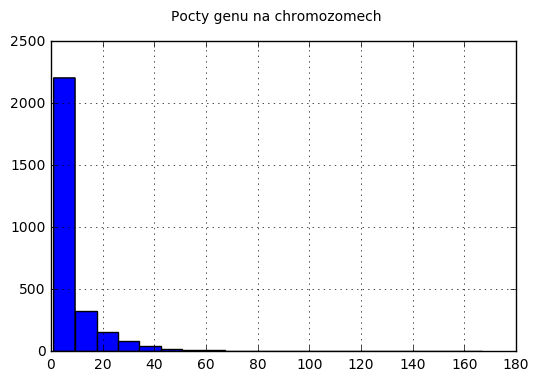

In [67]:
genesAttr["seqname"].value_counts().hist(bins=20)
pl.suptitle("Pocty genu na chromozomech")

In [68]:
genesAttr["seqname"].value_counts().head(10)

GL192348.1    167
GL192567.1    131
GL192357.1    127
GL192492.1    121
GL192537.1    119
GL192339.1    112
GL192356.1    105
GL192350.1     97
GL192354.1     94
GL192457.1     91
Name: seqname, dtype: int64

#### Počty transkriptů genů

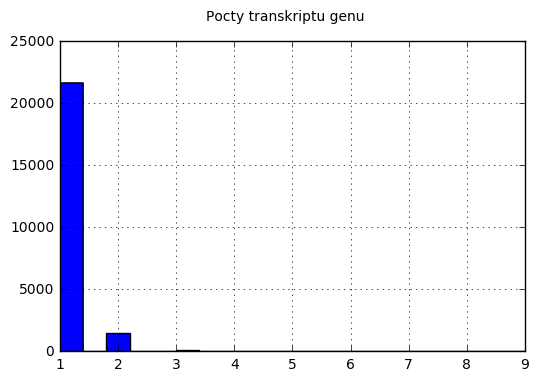

In [69]:
transcriptsAttr["gene_id"].value_counts().hist(bins=20)
pl.suptitle("Pocty transkriptu genu")

In [70]:
transcriptsAttr["gene_id"].value_counts().head(10)

ENSAMEG00000007611    9
ENSAMEG00000001766    7
ENSAMEG00000005352    5
ENSAMEG00000008170    5
ENSAMEG00000011637    5
ENSAMEG00000013097    5
ENSAMEG00000018398    5
ENSAMEG00000007413    4
ENSAMEG00000007344    4
ENSAMEG00000004903    4
Name: gene_id, dtype: int64

#### Distribuce délky genů

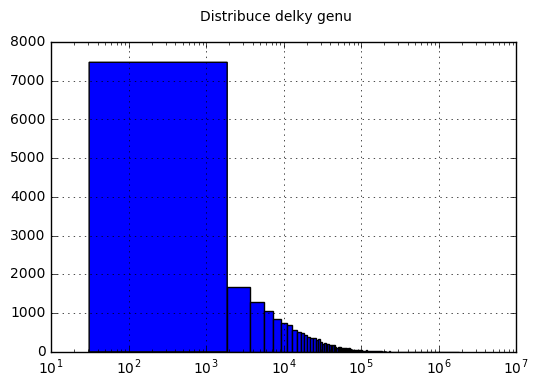

In [71]:
genesAttr["length"].hist(bins=1000)
pl.suptitle("Distribuce delky genu")
pl.xscale('log') 

#### Biotypy

In [72]:
genesAttr["gene_biotype"].value_counts()

protein_coding          19343
snRNA                    1211
pseudogene                769
miRNA                     743
snoRNA                    659
misc_RNA                  358
rRNA                      146
Mt_tRNA                    22
processed_pseudogene        9
Mt_rRNA                     2
Name: gene_biotype, dtype: int64

### Vztah délky genů a počtu transkriptů

###### Přidání sloupce s počtem transkriptů

In [73]:
gcs = pd.Series (transcriptsAttr["gene_id"].sort_values().value_counts())
gcs = gcs.rename ("number_of_transcripts")
gcdf = gcs.to_frame ()


In [74]:
results = pd.merge (genesAttr, gcdf, left_on='gene_id',right_index=True)


In [75]:
results.sort_values ('number_of_transcripts').tail()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,length,number_of_transcripts
20203,GL194059.1,ensembl,gene,11634,322441,.,+,.,protein_coding,ENSAMEG00000013097,NaN,310807,5
15166,GL193207.1,ensembl,gene,485841,581053,.,-,.,protein_coding,ENSAMEG00000008170,KRT10,95212,5
11682,GL192891.1,ensembl,gene,34110,157851,.,+,.,protein_coding,ENSAMEG00000005352,NaN,123741,5
9395,GL192731.1,ensembl,gene,58767,1488348,.,-,.,protein_coding,ENSAMEG00000001766,DUSP8,1429581,7
14974,GL193188.1,ensembl,gene,478741,678149,.,+,.,protein_coding,ENSAMEG00000007611,NaN,199408,9


###### Graf vztahu délky genu a počtu transkriptů

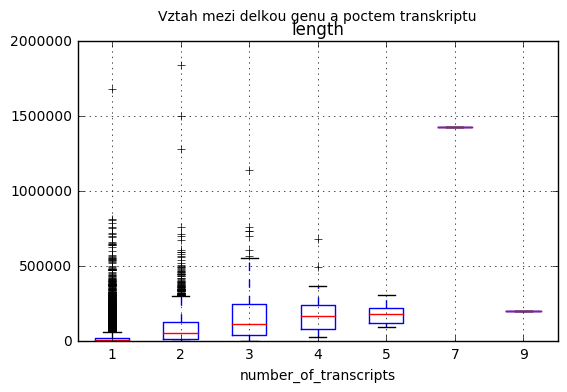

In [76]:
results.boxplot(column="length", by="number_of_transcripts")
pl.suptitle("Vztah mezi delkou genu a poctem transkriptu")

###### Korelační koeficient

In [77]:
results[["length", "number_of_transcripts"]].corr(method='pearson', min_periods=1)

,length,number_of_transcripts
length,1.000000,0.339236
number_of_transcripts,0.339236,1.000000


![panda](http://files.vividscreen.info/soft/4244d6509e281d4bedb855c253c8f223/Kung-Fu-Panda-3-HD-wide-i.jpg)